**Sentiment Analysis [X(twitter)]**

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expression
from collections import Counter 
from wordcloud import WordCloud
import nltk # natural language toolkit
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\srira\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
#loading dataset 
file_path ="x.csv"
#skip bad rows
df=pd.read_csv(file_path,encoding="utf8",on_bad_lines="skip")
print("shape:",df.shape)
df.head()

shape: (74681, 4)


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**Ensuring text column**

In [6]:
pos_col = ["Borderlands","Positive","message","Tweet","full_text","message","text"]
text_col = None
for c in pos_col:
    if c in df.columns:
        text_col =c
        break
if text_col is None:
    raise ValueError(f"Couldn't find text column:{list(df.columns)}")
    df =df.rename(columns={text_col:"text"})
    df["text"]=df["text"].astype(str)
    

**Cleaning Tweets**

In [13]:
df =df.rename(columns={text_col:"text"})
df["text"]=df["text"].astype(str)
def clean_tweets(s):
    s = re.sub(r"http\S+|www\.\S+", "", s)   
    s = re.sub(r"@\w+", "", s)               
    s = re.sub(r"#", "", s)                  
    s = re.sub(r"[^A-Za-z\s]", " ", s)       
    s = re.sub(r"\s+", " ", s).strip()       
    return s.lower()                        
df["cleaned_text"]=df["text"].apply(clean_tweets)
    

**Removing empty rows**

In [14]:
before = len(df)
df = df[df['cleaned_text'].str.len() > 0].copy()
df = df.drop_duplicates(subset=['cleaned_text'])
after = len(df)
print(f"Kept {after}/{before} rows after removing empty & duplicates.")


Kept 32/74681 rows after removing empty & duplicates.


In [17]:
sia = SentimentIntensityAnalyzer()
df['compound'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [18]:
def label_sentiment(c):
    if c > 0.05: return "Positive"
    if c < -0.05: return "Negative"
    return "Neutral"
df['sentiment'] = df['compound'].apply(label_sentiment)


In [19]:
counts = df['sentiment'].value_counts()
perc = (counts / counts.sum() * 100).round(1)


<Axes: xlabel='sentiment', ylabel='count'>

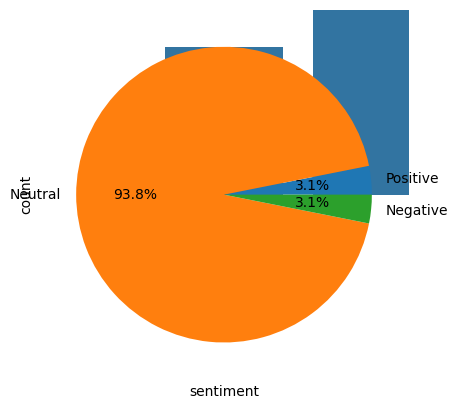

In [20]:
sns.countplot(x='sentiment', data=df, order=['Positive','Neutral','Negative'])
counts[['Positive','Neutral','Negative']].plot.pie(autopct='%1.1f%%')


In [28]:
pos_text = " ".join(df.loc[df['sentiment']=='Positive','cleaned_text']) 
neg_text = " ".join(df.loc[df['sentiment']=='Negative','cleaned_text'])

In [29]:

OUT_FILE = "tweets_sentiment_output.csv" 
df.to_csv(OUT_FILE, index=False) 
print(f"✅ Done! Saved labeled dataset to: {OUT_FILE}")

✅ Done! Saved labeled dataset to: tweets_sentiment_output.csv
